In [2]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
import matplotlib.pyplot as plt
df=pd.read_csv("Default.csv")

In [3]:
dict={"No":1,"Yes":0}
df['y']=df['default'].map(lambda x:dict[x])
one_hot = pd.get_dummies(df[["default","student"]], prefix=['default','student'])
result=pd.concat([df,one_hot], axis=1)
print(result.head(5))

   Unnamed: 0 default student      balance        income  y  default_No  \
0           1      No      No   729.526495  44361.625074  1           1   
1           2      No     Yes   817.180407  12106.134700  1           1   
2           3      No      No  1073.549164  31767.138947  1           1   
3           4      No      No   529.250605  35704.493935  1           1   
4           5      No      No   785.655883  38463.495879  1           1   

   default_Yes  student_No  student_Yes  
0            0           1            0  
1            0           0            1  
2            0           1            0  
3            0           1            0  
4            0           1            0  


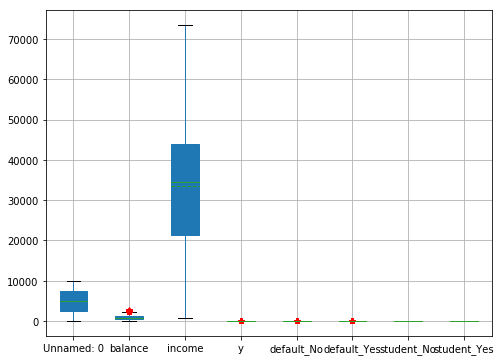

In [4]:
fig = plt.figure(figsize=(8,6))
result.boxplot(sym='r*',vert=True,patch_artist=True,meanline=True,showmeans=True) 
plt.show()


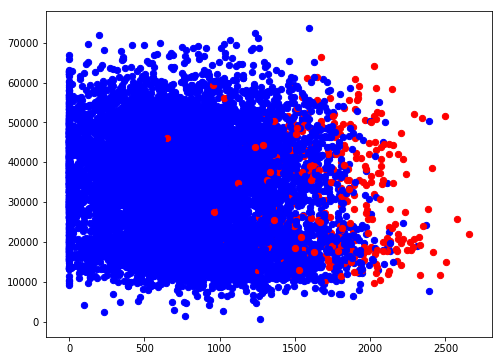

In [5]:
fig = plt.figure(figsize=(8,6))
x=result['balance'].values
y=result['income'].values
z=result['y'].values
for i in range(len(x)):
    if(z[i]==0):
       c='r'
    else:
       c='b'
    plt.scatter(x[i],y[i],c=c,s=40, cmap=plt.cm.Spectral)
plt.show()

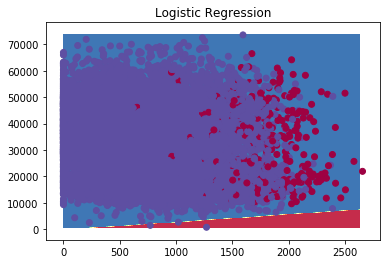

AUC= 0.612472242783
ROC= 0.612472242783


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation,metrics 

X=result[['balance','income']].values
y=result['y'].values
train_x,test_x,train_y,test_y = cross_validation.train_test_split(X,y,test_size=0.2,random_state=27)
lr=LogisticRegression(random_state=0)
lr.fit(train_x,train_y)

def plot_decision_boundary(pred_func):  
  
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5  
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5  
    h = 105
  
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))  
  
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])  
    Z = Z.reshape(xx.shape)  
  
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)  
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    
    
predict_prob_y = lr.predict_proba(test_x)

plot_decision_boundary(lambda x: lr.predict(x))  
plt.title("Logistic Regression")  
plt.show()  

test_auc = metrics.roc_auc_score(test_y,predict_prob_y[:,1])
test_roc=metrics.roc_auc_score(test_y,predict_prob_y[:,1])
print("AUC=",test_auc)
print("ROC=",test_roc)

[ -1.30724482e-04  -8.02000032e-08  -8.12179091e-03   8.12179091e-03]
1.08251514888


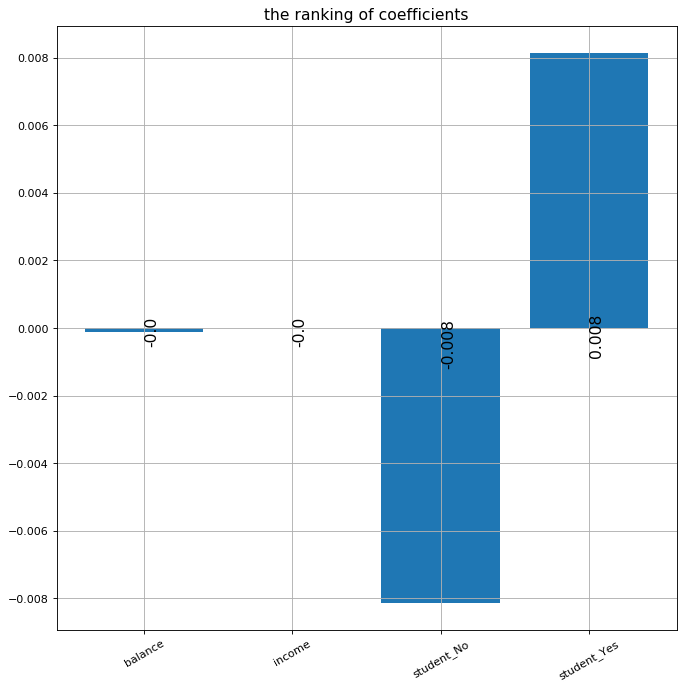

In [7]:
from sklearn.linear_model import Ridge
from sklearn import cross_validation,metrics 
feature=['balance','income','student_No','student_Yes']
X=result[feature].values
y=result['y'].values
train_x,test_x,train_y,test_y = cross_validation.train_test_split(X,y,test_size=0.2,random_state=27)#把训练集按0.2的比例划分为训练集和验证集
clf = Ridge(alpha=.5)
clf.fit(train_x,train_y) 
scores=clf.coef_
print(scores)
print(clf.intercept_)

plt.figure(figsize=(10, 10), dpi=80)
rect = plt.bar(range(len(feature)), scores)
for rec in rect:
    x = rec.get_x()
    height = rec.get_height()
    plt.text(x + 0.4,  0.01*height, str(round(height, 3)), fontsize=14, rotation='vertical')
plt.xticks(range(len(feature)), feature, rotation=30, fontsize=10)
plt.title(u"the ranking of coefficients", fontsize=14)  
plt.grid(True)
plt.legend(loc='upper right') 
plt.show()
plt.clf()

In [8]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr,X,y, cv=3)
print(scores)

[ 0.96670666  0.96669667  0.96579658]


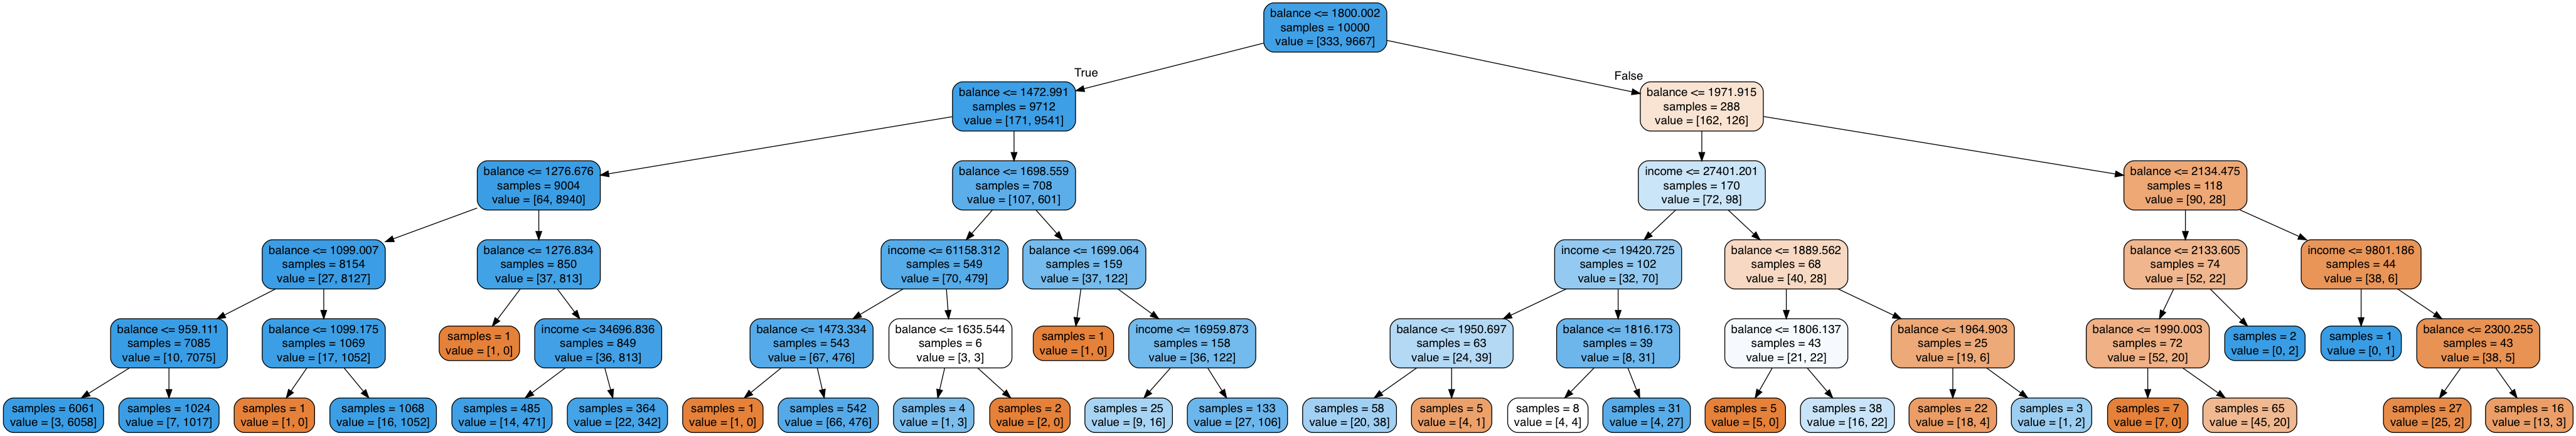

In [9]:
from sklearn import tree
import pydotplus
from IPython.display import Image
clf = tree.DecisionTreeClassifier(max_depth = 5)
clf = clf.fit(X, y)
dot_data = \
    tree.export_graphviz(
        clf,
        out_file = None,
        feature_names =feature,
        filled = True,
        impurity = False,
        rounded = True
    )
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [10]:
from sklearn.grid_search import GridSearchCV
tree_param_grid = { 'min_samples_split': list((3,6,9)),'max_depth':list((2,3,4,5))}
grid = GridSearchCV(tree.DecisionTreeClassifier(),param_grid=tree_param_grid, cv=5)
grid.fit(X, y)
grid.grid_scores_, grid.best_params_, grid.best_score_

([mean: 0.97140, std: 0.00135, params: {'max_depth': 2, 'min_samples_split': 3},
  mean: 0.97140, std: 0.00135, params: {'max_depth': 2, 'min_samples_split': 6},
  mean: 0.97140, std: 0.00135, params: {'max_depth': 2, 'min_samples_split': 9},
  mean: 0.97040, std: 0.00204, params: {'max_depth': 3, 'min_samples_split': 3},
  mean: 0.97040, std: 0.00204, params: {'max_depth': 3, 'min_samples_split': 6},
  mean: 0.97040, std: 0.00204, params: {'max_depth': 3, 'min_samples_split': 9},
  mean: 0.97030, std: 0.00163, params: {'max_depth': 4, 'min_samples_split': 3},
  mean: 0.97010, std: 0.00160, params: {'max_depth': 4, 'min_samples_split': 6},
  mean: 0.97010, std: 0.00160, params: {'max_depth': 4, 'min_samples_split': 9},
  mean: 0.97050, std: 0.00192, params: {'max_depth': 5, 'min_samples_split': 3},
  mean: 0.97030, std: 0.00180, params: {'max_depth': 5, 'min_samples_split': 6},
  mean: 0.97010, std: 0.00174, params: {'max_depth': 5, 'min_samples_split': 9}],
 {'max_depth': 2, 'min_samp